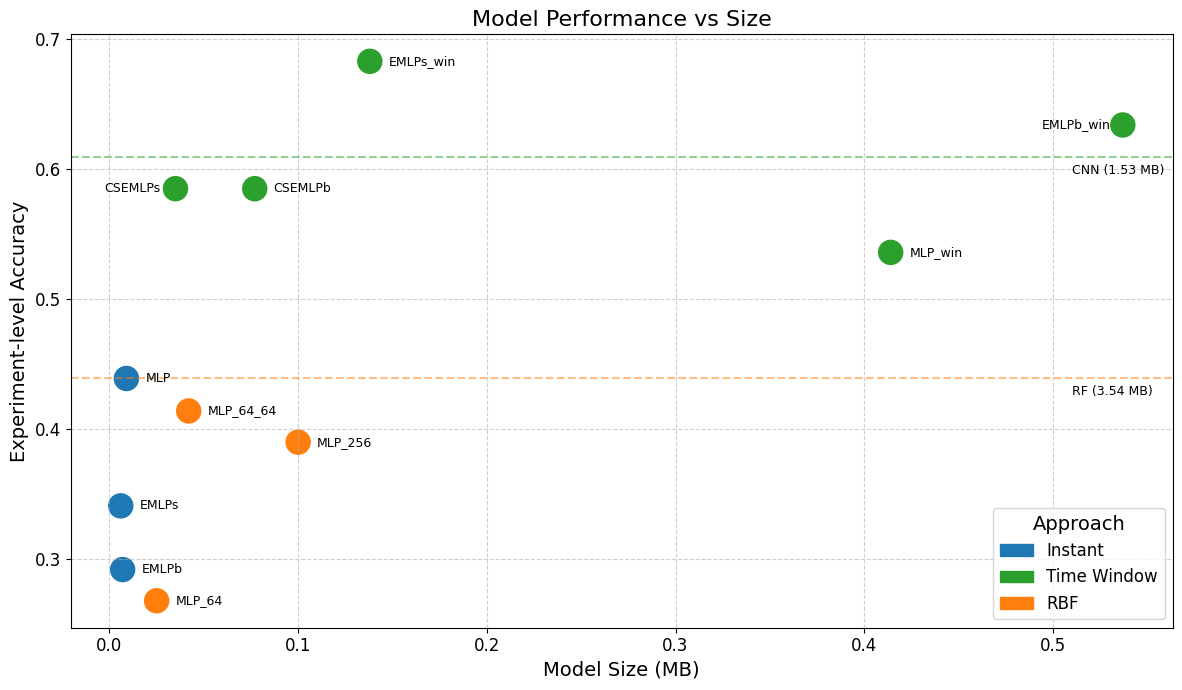

In [33]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Dati aggiornati
model_names = [
    "MLP", "EMLPs", "EMLPb",
    "MLP_win", "EMLPs_win", "EMLPb_win", "CSEMLPs", "CSEMLPb",
    "MLP_64", "MLP_256", "MLP_64_64"
]
model_sizes = [
    0.009, 0.006, 0.007,
    0.414, 0.138, 0.537, 0.035, 0.077,
    0.025, 0.100, 0.042
]
experiment_accuracies = [
    0.439, 0.341, 0.292,
    0.536, 0.683, 0.634, 0.585, 0.585,
    0.268, 0.390, 0.414
]
approaches = [
    "Instant", "Instant", "Instant",
    "Time Window", "Time Window", "Time Window", "Time Window", "Time Window",
    "RBF", "RBF", "RBF"
]

# Colori
approach_colors = {
    "Instant": "tab:blue",
    "Time Window": "tab:green",
    "RBF": "tab:orange"
}
colors = [approach_colors[app] for app in approaches]

# Inizializza grafico
plt.figure(figsize=(12, 7))
scatter = plt.scatter(model_sizes, experiment_accuracies, s=300, c=colors)

# Linee orizzontali per CNN e RF
plt.axhline(y=0.609, color=approach_colors["Time Window"], linestyle='--', alpha=0.5)
plt.text(0.51, 0.599, "CNN (1.53 MB)", color='black', va='center', fontsize=9)

plt.axhline(y=0.439, color=approach_colors["RBF"], linestyle='--', alpha=0.5)
plt.text(0.51, 0.429, "RF (3.54 MB)", color='black', va='center', fontsize=9)

# Annotazioni
for name, x, y in zip(model_names, model_sizes, experiment_accuracies):
    if name == "CSEMLPs":
        plt.text(x - 0.038, y, name, fontsize=9, color='black', ha='left', va='center')
    elif name == "EMLPb_win":
        plt.text(x - 0.043, y, name, fontsize=9, color='black', ha='left', va='center')
    else:
        plt.text(x + 0.01, y, name, fontsize=9, color='black', ha='left', va='center')


# Etichette e stile
plt.xlabel("Model Size (MB)", fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel("Experiment-level Accuracy", fontsize=14)
plt.yticks(fontsize=12)
plt.title("Model Performance vs Size", fontsize=16)
plt.grid(True, linestyle='--', alpha=0.6)

# Legenda
legend_elements = [mpatches.Patch(color=c, label=a) for a, c in approach_colors.items()]
plt.legend(handles=legend_elements, title="Approach", loc='lower right', fontsize=12, title_fontsize=14)

# Salva
plt.tight_layout()
plt.savefig("model_performance_vs_size_lines.png", dpi=300)
plt.show()
